In [1]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt
COLOR = '#40a6d1'
# Plotting

def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

    



Creating initial graph...
Edge added: 13 7
Edge added: 13 4
Edge added: 13 3
Edge added: 13 12
Edge added: 13 5
Edge added: 13 2
Edge added: 13 0
Edge added: 14 2
Edge added: 14 11
Edge added: 14 8
Edge added: 14 0
Edge added: 14 10
Edge added: 14 3
Edge added: 14 6
Edge added: 15 8
Edge added: 15 6
Edge added: 15 11
Edge added: 15 3
Edge added: 15 13
Edge added: 15 5
Edge added: 15 4
Edge added: 16 5
Edge added: 16 12
Edge added: 16 9
Edge added: 16 6
Edge added: 16 15
Edge added: 16 2
Edge added: 16 7
Edge added: 17 7
Edge added: 17 12
Edge added: 17 3
Edge added: 17 9
Edge added: 17 13
Edge added: 17 10
Edge added: 17 0
Edge added: 18 6
Edge added: 18 8
Edge added: 18 14
Edge added: 18 3
Edge added: 18 4
Edge added: 18 9
Edge added: 18 11
Edge added: 19 1
Edge added: 19 3
Edge added: 19 7
Edge added: 19 0
Edge added: 19 9
Edge added: 19 6
Edge added: 19 13
Edge added: 20 7
Edge added: 20 4
Edge added: 20 17
Edge added: 20 14
Edge added: 20 10
Edge added: 20 15
Edge added: 20 8
Edg

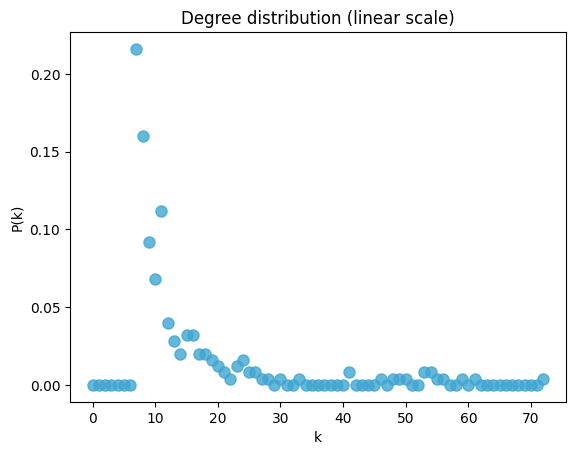

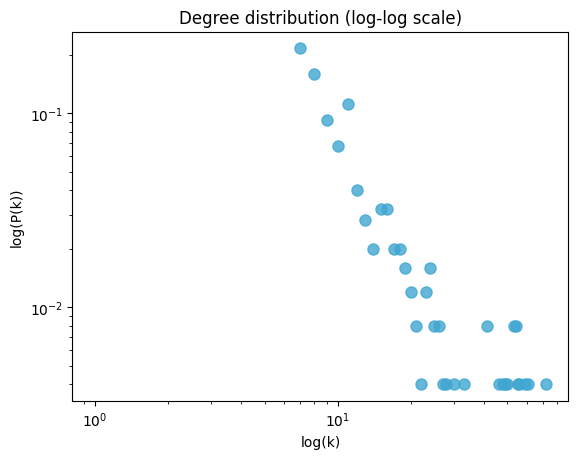

(None, None)

In [6]:
# BA algo functions

def rand_prob_node():
    nodes_probs = []
    for node in G.nodes():
        node_degr = G.degree(node)
        #print(node_degr)
        node_proba = node_degr / (2 * len(G.edges()))
        #print("Node proba is: {}".format(node_proba))
        nodes_probs.append(node_proba)
        #print("Nodes probablities: {}".format(nodes_probs))
    random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)
    #print("Randomly selected node is: {}".format(random_proba_node))
    return random_proba_node

def add_edge():
        if len(G.edges()) == 0:
            random_proba_node = 0
        else:
            random_proba_node = rand_prob_node()
        new_edge = (random_proba_node, new_node)
        if new_edge in G.edges():
            
            add_edge()
        else:
           
            G.add_edge(new_node, random_proba_node)
            print("Edge added: {} {}".format(new_node + 1, random_proba_node))


# Get parameters
init_nodes = int(input("Please type in the initial number of nodes (m_0): "))
final_nodes = int(input("\nPlease type in the final number of nodes: "))
m_parameter = int(input("\nPlease type in the value of m parameter (m<=m_0): "))

print("\n")
print("Creating initial graph...")

G = nx.complete_graph(init_nodes)



count = 0
new_node = init_nodes

for f in range(final_nodes - init_nodes):
    
    G.add_node(init_nodes + count)
   
    count += 1
    for e in range(0, m_parameter):
        add_edge()
    new_node += 1
k_distrib(G), k_distrib(G, scale = 'log', fit_line = False)

           

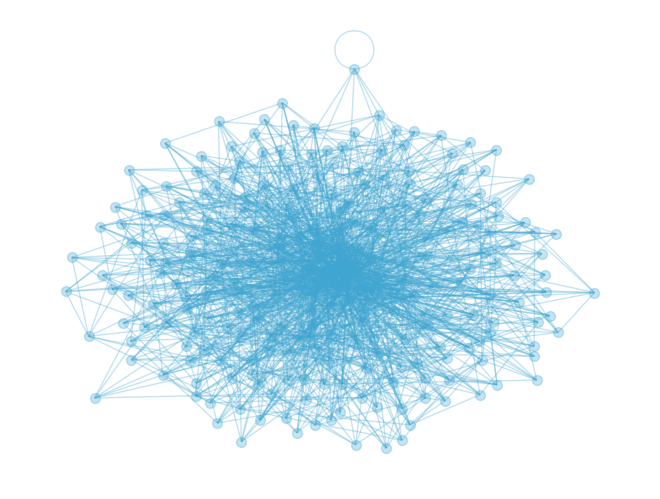

In [7]:
# Plot the network
nx.draw(G, alpha = .3, edge_color = COLOR, node_color = COLOR, node_size=50)

C:\Users\sutir\AppData\Local\Temp\ipykernel_15536\2959324233.py:190: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap(colormap),


TypeError: 'dict_values' object is not subscriptable

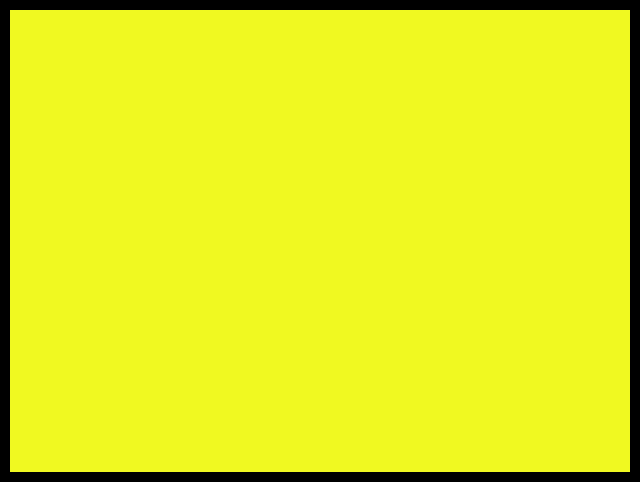

In [44]:
# Standard Library
import random
from collections import defaultdict
from copy import copy

# Third Party
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib import cm
from scipy.interpolate import splprep, splev
from scipy.spatial import ConvexHull


##################
# COMMUNITY LAYOUT
##################


def _inter_community_edges(G, partition):
    edges = defaultdict(list)

    for (i, j) in G.edges():
        c_i = partition[i]
        c_j = partition[j]

        if c_i == c_j:
            continue

        edges[(c_i, c_j)].append((i, j))

    return edges


def _position_communities(G, partition, **kwargs):
    hypergraph = nx.Graph()
    hypergraph.add_nodes_from(set(partition))

    inter_community_edges = _inter_community_edges(G, partition)
    for (c_i, c_j), edges in inter_community_edges.items():
        hypergraph.add_edge(c_i, c_j, weight=len(edges))

    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # Set node positions to positions of its community
    pos = dict()
    for node, community in enumerate(partition):
        pos[node] = pos_communities[community]

    return pos


def _position_nodes(G, partition, **kwargs):
    communities = defaultdict(list)
    for node, community in enumerate(partition):
        communities[community].append(node)

    pos = dict()
    for c_i, nodes in communities.items():
        subgraph = G.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos


# Adapted from: https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx
def community_layout(G, partition):
    pos_communities = _position_communities(G, partition, scale=10.0)
    pos_nodes = _position_nodes(G, partition, scale=2.0)

    # Combine positions
    pos = dict()
    for node in G.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos


#########
# PATCHES
#########


def _node_coordinates(nodes):
    collection = copy(nodes)
    collection.set_offset_position("data")
    return collection.get_offsets()


def _convex_hull_vertices(node_coordinates, community):
    points = np.array(node_coordinates[list(community)])
    hull = ConvexHull(points)

    x, y = points[hull.vertices, 0], points[hull.vertices, 1]
    vertices = np.column_stack((x, y))

    return vertices


# https://en.wikipedia.org/wiki/Shoelace_formula#Statement
def _convex_hull_area(vertices):
    A = 0.0
    for i in range(-1, vertices.shape[0] - 1):
        A += vertices[i][0] * (vertices[i + 1][1] - vertices[i - 1][1])

    return A / 2


# https://en.wikipedia.org/wiki/Centroid#Of_a_polygon
def _convex_hull_centroid(vertices):
    A = _convex_hull_area(vertices)

    c_x, c_y = 0.0, 0.0
    for i in range(vertices.shape[0]):
        x_i, y_i = vertices[i]
        if i == vertices.shape[0] - 1:
            x_i1, y_i1 = vertices[0]
        else:
            x_i1, y_i1 = vertices[i + 1]

        cross = ((x_i * y_i1) - (x_i1 * y_i))

        c_x += (x_i + x_i1) * cross
        c_y += (y_i + y_i1) * cross

    return c_x / (6 * A), c_y / (6 * A)


def _scale_convex_hull(vertices, offset):
    c_x, c_y = _convex_hull_centroid(vertices)
    for i, vertex in enumerate(vertices):
        v_x, v_y = vertex

        if v_x > c_x:
            vertices[i][0] += offset
        else:
            vertices[i][0] -= offset
        if v_y > c_y:
            vertices[i][1] += offset
        else:
            vertices[i][1] -= offset

    return vertices


def _community_patch(vertices):
    vertices = _scale_convex_hull(vertices, 1) # TODO: Make offset dynamic
    tck, u = splprep(vertices.T, u=None, s=0.0, per=1)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, der=0)

    path = Path(np.column_stack((x_new, y_new)))
    patch = PathPatch(path, alpha=0.50, linewidth=0.0)
    return patch


def draw_community_patches(nodes, communities, axes):
    node_coordinates = _node_coordinates(nodes)
    vertex_sets = []
    for c_i, community in enumerate(communities):
        vertices = _convex_hull_vertices(node_coordinates, community)
        patch = _community_patch(vertices)
        patch.set_facecolor(nodes.to_rgba(c_i))

        axes.add_patch(patch)
        vertex_sets.append(patch.get_path().vertices)

    _vertices = np.concatenate(vertex_sets)
    xlim = [_vertices[:, 0].min(), _vertices[:, 0].max()]
    ylim = [_vertices[:, 1].min(), _vertices[: ,1].max()]

    axes.set_xlim(xlim)
    axes.set_ylim(ylim)


##################
# DRAW COMMUNITIES
##################


def draw_communities(adj_matrix, communities, dark=False, filename=None, dpi=None, seed=1):
    np.random.seed(seed)
    random.seed(seed)

    G = nx.from_numpy_matrix(adj_matrix)
    partition = [0 for _ in range(G.number_of_nodes())]
    for c_i, nodes in enumerate(communities):
        for i in nodes:
            partition[i] = c_i

    plt.rcParams["figure.facecolor"] = "black" if dark else "white"
    plt.rcParams["axes.facecolor"] = "black" if dark else "white"

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis("off")

    node_size = 10200 / G.number_of_nodes()
    linewidths = 34 / G.number_of_nodes()

    pos = community_layout(G, partition)
    nodes = nx.draw_networkx_nodes(
        G,
        pos=pos,
        node_color=partition,
        linewidths=linewidths,
        cmap=cm.jet,
        ax=ax
    )
    nodes.set_edgecolor("w")
    edges = nx.draw_networkx_edges(
        G,
        pos=pos,
        edge_color=(1.0, 1.0, 1.0, 0.75) if dark else (0.6, 0.6, 0.6, 1.0),
        width=linewidths,
        ax=ax
    )
    draw_community_patches(nodes, communities, ax)

    if not filename:
        plt.show()
    else:
        plt.savefig(filename, dpi=dpi)

    return ax

    

AttributeError: 'PathCollection' object has no attribute 'set_offset_position'

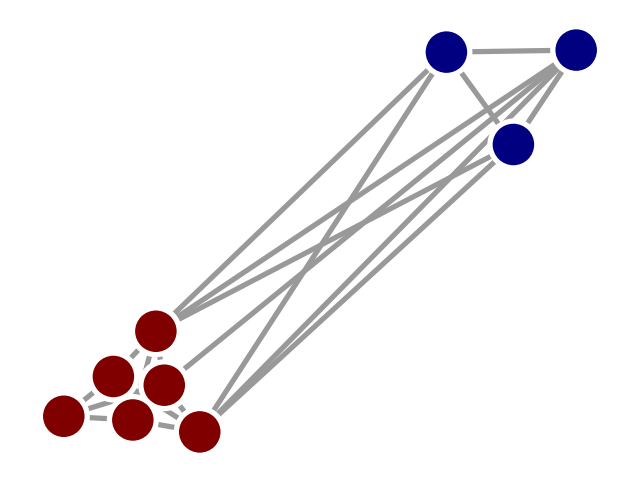

In [87]:
# Standard Library
from itertools import combinations, chain
from collections import defaultdict

# Third Party
import numpy as np

# Standard Library
from itertools import product, combinations
from typing import Callable

# Third Party
import numpy as np


######
# MAIN
######


def intercommunity_matrix(adj_matrix : np.ndarray, communities : list,
                          aggr : Callable = sum) -> np.ndarray:
    num_nodes = len(communities)
    intercomm_adj_matrix = np.zeros((num_nodes, num_nodes))
    for i, src_comm in enumerate(communities):
        for j, targ_comm in enumerate(communities):
            if j > i:
                break

            edge_weights = []
            for u, v in product(src_comm, targ_comm):
                edge_weights.append(adj_matrix[u, v])

            edge_weight = aggr(edge_weights)
            intercomm_adj_matrix[i, j] = edge_weight
            intercomm_adj_matrix[j, i] = edge_weight

    return intercomm_adj_matrix


def laplacian_matrix(adj_matrix : np.ndarray) -> np.ndarray:
    diagonal = adj_matrix.sum(axis=0)
    D = np.diag(diagonal)
    L = D - adj_matrix

    return L


def modularity_matrix(adj_matrix : np.ndarray) -> np.ndarray:
    k_i = np.expand_dims(adj_matrix.sum(axis=1), axis=1)
    k_j = k_i.T
    norm = 1 / k_i.sum()
    K = norm * np.matmul(k_i, k_j)

    return norm * (adj_matrix - K)


def modularity(mod_matrix : np.ndarray, communities : list) -> float:
    C = np.zeros_like(mod_matrix)
    for community in communities:
        for i, j in combinations(community, 2):
            C[i, j] = 1.0
            C[j, i] = 1.0

    return np.tril(np.multiply(mod_matrix, C), 0).sum()

#########
# HELPERS
#########


def initialize_node_to_comm(adj_matrix):
    return list(range(len(adj_matrix)))


def invert_node_to_comm(node_to_comm):
    communities = defaultdict(set)
    for node, community in enumerate(node_to_comm):
        communities[community].add(node)

    return list(communities.values())


def get_all_edges(nodes):
    return chain(combinations(nodes, 2), ((u, u) for u in nodes))


########
# PHASES
########


def run_first_phase(node_to_comm, adj_matrix, n, force_merge=False):
    M = modularity_matrix(adj_matrix)
    best_node_to_comm = node_to_comm.copy()
    num_communities = len(set(best_node_to_comm))
    is_updated = not (n and num_communities == n)
    ani_frames = [{"C": best_node_to_comm, "Q": 0.0}]

    # QUESTION: Randomize the order of the nodes before iterating?
    while is_updated:
        is_updated = False
        for i, neighbors in enumerate(adj_matrix):
            num_communities = len(set(best_node_to_comm))
            if n and num_communities == n:
                break

            best_Q = modularity(M, invert_node_to_comm(best_node_to_comm))
            max_delta_Q = 0.0
            updated_node_to_comm, visited_communities = best_node_to_comm, set()
            for j, weight in enumerate(neighbors):
                # Skip if self-loop or not neighbor
                if i == j or not weight:
                    continue

                neighbor_comm = best_node_to_comm[j]
                if neighbor_comm in visited_communities:
                    continue

                # Remove node i from its community and place it in the community
                # of its neighbor j
                candidate_node_to_comm = best_node_to_comm.copy()
                candidate_node_to_comm[i] = neighbor_comm

                candidate_Q = modularity(
                    M,
                    invert_node_to_comm(candidate_node_to_comm)
                )
                delta_Q = candidate_Q - best_Q
                if delta_Q > max_delta_Q or (force_merge and not max_delta_Q):
                    updated_node_to_comm = candidate_node_to_comm
                    max_delta_Q = delta_Q

                    ani_frames.append({
                        "C": candidate_node_to_comm,
                        "Q": candidate_Q
                    })

                visited_communities.add(neighbor_comm)

            # Set Q for first frame
            if not i and ani_frames[0]["C"] == best_node_to_comm:
                ani_frames[0]["Q"] = best_Q

            if best_node_to_comm != updated_node_to_comm:
                best_node_to_comm = updated_node_to_comm
                is_updated = True

    if ani_frames[-1]["C"] != best_node_to_comm:
        ani_frames.append({"C": best_node_to_comm, "Q": best_Q})

    return best_node_to_comm, ani_frames


def run_second_phase(node_to_comm, adj_matrix, true_partition, true_comms):
    comm_to_nodes = defaultdict(lambda: [])
    for i, comm in enumerate(node_to_comm):
        comm_to_nodes[comm].append(i)
    comm_to_nodes = list(comm_to_nodes.items())

    new_adj_matrix, new_true_partition = [], []
    for i, (comm, nodes) in enumerate(comm_to_nodes):
        true_nodes = {v for u in nodes for v in true_partition[u]}
        true_comms[i] = true_comms[comm]

        row_vec = []
        for j, (_, neighbors) in enumerate(comm_to_nodes):
            if i == j:  # Sum all intra-community weights and add as self-loop
                edge_weights = (adj_matrix[u][v]
                                for u, v in get_all_edges(nodes))
                edge_weight = 2 * sum(edge_weights)
            else:
                edge_weights = (adj_matrix[u][v]
                                for u in nodes for v in neighbors)
                edge_weight = sum(edge_weights)

            row_vec.append(edge_weight)

        new_true_partition.append(true_nodes)
        new_adj_matrix.append(row_vec)

    # TODO: Use numpy more efficiently
    return np.array(new_adj_matrix), new_true_partition, true_comms


######
# MAIN
######


def louvain_method(adj_matrix : np.ndarray, n : int = None) -> list:
    optimal_adj_matrix = adj_matrix
    node_to_comm = initialize_node_to_comm(adj_matrix)
    true_partition = [{i} for i in range(len(adj_matrix))]
    true_comms = {c: c for c in node_to_comm}

    M = modularity_matrix(adj_matrix)
    def update_frame(frame, partition, comm_aliases, recalculate_Q):
        true_node_to_comm = list(range(len(adj_matrix)))
        for i, community in enumerate(frame["C"]):
            for node in partition[i]:
                true_node_to_comm[node] = comm_aliases[community]

        frame["C"] = true_node_to_comm
        if recalculate_Q:
            frame["Q"] = modularity(M, invert_node_to_comm(frame["C"]))

        return frame

    ani_frames = []
    is_optimal = False
    while not is_optimal:
        optimal_node_to_comm, frames = run_first_phase(
            node_to_comm,
            optimal_adj_matrix,
            n
        )

        if optimal_node_to_comm == node_to_comm:
            if not n:
                frames = (update_frame(f, true_partition, true_comms, bool(ani_frames)) for f in frames)
                ani_frames.extend(frames)
                break

            optimal_node_to_comm, frames = run_first_phase(
                node_to_comm,
                optimal_adj_matrix,
                n,
                force_merge=True
            )

        frames = (update_frame(f, true_partition, true_comms, bool(ani_frames)) for f in frames)
        ani_frames.extend(frames)

        optimal_adj_matrix, true_partition, true_comms = run_second_phase(
            optimal_node_to_comm,
            optimal_adj_matrix,
            true_partition,
            true_comms
        )

        if n and len(true_partition) == n:
            break

        node_to_comm = initialize_node_to_comm(optimal_adj_matrix)

    return true_partition, ani_frames

adj_matrix = np.array([[0, 1, 1, 0, 0, 0,1,0,1],
                       [1, 0, 1, 0, 0, 0,1,0,1],
                       [1, 1, 0, 1, 0, 0,1,0,1],
                       [0, 0, 1, 0, 1, 1,0,1,0],
                       [0, 0, 0, 1, 0, 1,0,1,0],
                       [0, 0, 0, 1, 1, 0,0,1,0],
                       [0, 0, 0, 1, 1, 0,0,1,0],
                       [0, 0, 0, 1, 1, 0,0,1,0],
                       [0, 0, 0, 1, 1, 0,0,1,0]])




communities, frames = louvain_method(adj_matrix)

draw_communities(adj_matrix, communities)

In [89]:
# Standard Library
import random
from collections import defaultdict, namedtuple

# Third Party
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation

# Constants for visual styles
Artists = namedtuple("Artists", ("network_nodes", "network_edges", "modularity_line", "ax0_title", "ax1_title"))
HYPERGRAPH_SCALE = 16.0
SUBGRAPH_SCALE = 4.0
GREY = (1.0, 1.0, 1.0, 0.75)
TITLE_GREY = (0.15, 0.15, 0.15, 1.0)
DARK_GREY = (0.3, 0.3, 0.3, 1.0)
LIGHT_GREY = (0.6, 0.6, 0.6, 1.0)


################
# CLUSTER LAYOUT
################

def _inter_cluster_edges(G, partition):
    edges = defaultdict(list)

    for (i, j) in G.edges():
        c_i = partition[i]
        c_j = partition[j]

        if c_i == c_j:
            continue

        edges[(c_i, c_j)].append((i, j))

    return edges


def _position_clusters(G, partition, **kwargs):
    hypergraph = nx.Graph()
    hypergraph.add_nodes_from(set(partition))

    inter_cluster_edges = _inter_cluster_edges(G, partition)
    for (c_i, c_j), edges in inter_cluster_edges.items():
        hypergraph.add_edge(c_i, c_j, weight=len(edges))

    pos_clusters = nx.circular_layout(hypergraph, scale=HYPERGRAPH_SCALE)
    return pos_clusters


def _position_nodes(G, partition, **kwargs):
    clusters = defaultdict(list)
    for node, community in enumerate(partition):
        clusters[community].append(node)

    pos = {}
    for c_i, nodes in clusters.items():
        subgraph = G.subgraph(nodes)
        if "pos" in kwargs:
            init_pos = {n: kwargs["pos"][n] for n in nodes if n in kwargs["pos"]}
            init_fixed = list(init_pos.keys())
            pos_subgraph = nx.spring_layout(
                subgraph,
                **{
                    **kwargs,
                    **{
                        "pos": init_pos if init_pos else None,
                        "fixed": init_fixed if "fixed" not in kwargs and init_fixed else None,
                        "scale": SUBGRAPH_SCALE
                    }
                }
            )
        else:
            pos_subgraph = nx.spring_layout(subgraph, **{**kwargs, **{"scale": SUBGRAPH_SCALE}})

        pos.update(pos_subgraph)

    return pos


def cluster_layout(G, pos_nodes, pos_clusters):
    pos = {}
    for node in G.nodes():
        pos[node] = pos_nodes[node] + pos_clusters[node]

    return pos


###############
# INTERPOLATION
###############

def _pos_endpoints(G, frames, seed):
    prev_pos_clusters = None
    prev_pos_nodes = None

    pos_endpoints = []
    for i in range(len(frames) - 1):
        partition = frames[i]["C"]
        next_partition = frames[i + 1]["C"]

        if not prev_pos_clusters and not prev_pos_nodes:
            prev_pos_clusters = _position_clusters(G, partition)
            prev_pos_nodes = _position_nodes(G, partition, seed=seed)

        _prev_pos_clusters = {i: prev_pos_clusters[c_i] for i, c_i in enumerate(partition)}
        source_pos = cluster_layout(G, prev_pos_nodes, _prev_pos_clusters)

        init_pos_nodes = {}
        for node in G.nodes():
            if partition[node] != next_partition[node]:
                continue

            init_pos_nodes[node] = prev_pos_nodes[node]

        mid_pos_nodes = _position_nodes(G, partition, pos=init_pos_nodes, seed=seed)
        mid_pos = cluster_layout(G, mid_pos_nodes, _prev_pos_clusters)

        target_pos_nodes = _position_nodes(G, partition, pos=mid_pos_nodes, fixed=None, seed=seed)
        target_pos_clusters = _position_clusters(G, partition)
        target_pos = cluster_layout(
            G,
            target_pos_nodes,
            {i: target_pos_clusters[c_i] for i, c_i in enumerate(next_partition)}
        )

        prev_pos_clusters = target_pos_clusters
        prev_pos_nodes = target_pos_nodes

        pos_endpoints.append((source_pos, mid_pos, target_pos))

    return pos_endpoints


def _max_euclidean_distance(source_pos, target_pos):
    distances = []
    for node in source_pos.keys():
        distance = np.linalg.norm(target_pos[node] - source_pos[node])
        distances.append(distance)

    return max(distances)


def _transition_lengths(frames, pos_endpoints):
    trans_distances = []
    for i in range(len(frames) - 1):
        source_pos, mid_pos, target_pos = pos_endpoints[i]
        mid_distance = _max_euclidean_distance(source_pos, mid_pos)
        target_distance = _max_euclidean_distance(mid_pos, target_pos)
        trans_distances.extend([mid_distance, target_distance])

    D = np.array(trans_distances)
    n_min, n_max = 2, int(len(frames) / 7)
    norm_D = (D - D.min()) / D.ptp() * (n_max - n_min) + n_min

    trans_lengths = ((norm_D[i], norm_D[i + 1]) for i in range(0, len(norm_D), 2))
    return [(int(mid_l) - 1, int(targ_l) - 1) for mid_l, targ_l in trans_lengths]


def _interpolate_frames(G, base_frame, source_pos, target_pos, interpol_len):
    for j in range(interpol_len + 1):
        frame = base_frame.copy()
        frame["pos"] = {}
        for n in range(G.number_of_nodes()):
            frame["pos"][n] = source_pos[n] * (1 - j / interpol_len)
            frame["pos"][n] += target_pos[n] * j / interpol_len

        yield frame


def interpolate(G, frames, seed):
    pos_endpoints = _pos_endpoints(G, frames, seed)
    trans_lengths = _transition_lengths(frames, pos_endpoints)

    interpolated_frames = []
    _iter_batch = zip(range(len(frames) - 1), pos_endpoints, trans_lengths)
    for i, (source_pos, mid_pos, target_pos), (mid_len, targ_len) in _iter_batch:
        mid_frames = _interpolate_frames(
            G,
            {**frames[i], **{"index": i}},
            source_pos,
            mid_pos,
            mid_len
        )
        target_frames = _interpolate_frames(
            G,
            {**frames[i], **{"C": frames[i + 1]["C"], "index": i}},
            mid_pos,
            target_pos,
            targ_len
        )

        interpolated_frames.extend(mid_frames)
        interpolated_frames.extend(target_frames)

    last_frame = frames[-1].copy()
    last_frame["pos"] = target_pos
    last_frame["index"] = len(frames) - 1

    return interpolated_frames + [last_frame, last_frame]


###########
# ANIMATION
###########

class Animation(object):
    def __init__(self, A, frames, seed=2, dark=True):
        np.random.seed(seed)
        random.seed(seed)

        self.G = nx.from_numpy_array(A)  # Use from_numpy_array
        self.interpolated_frames = interpolate(self.G, frames, seed)

        self.x = list(range(len(frames)))
        self.y = [frame["Q"] for frame in frames]

        self.is_dark = dark
        plt.rcParams["figure.facecolor"] = "black" if dark else "white"
        plt.rcParams["axes.facecolor"] = "black" if dark else "white"

        self.fig, (self.ax0, self.ax1) = plt.subplots(1, 2, figsize=(12, 6))
        self.artists = None

    def _calculate_axes_limits(self, node_size, node_border_size):
        x, y = [], []
        for frame in self.interpolated_frames:
            for coordinate in frame["pos"].values():
                x.append(coordinate[0])
                y.append(coordinate[1])

        xlim = [min(x), max(x)]
        ylim = [min(y), max(y)]

        xy_pixels = self.ax0.transData.transform(np.vstack([xlim, ylim]).T)
        xpix, ypix = xy_pixels.T

        offset = 2 * node_size + (node_border_size * 2)
        xlim_pix = [xpix[0] - offset, xpix[1] + offset]
        ylim_pix = [ypix[0] - offset, ypix[1] + offset]

        xy_coords = self.ax0.transAxes.inverted().transform(np.vstack([xlim_pix, ylim_pix]).T)
        xlim, ylim = xy_coords.T

        return xlim, ylim

    def init_fig(self):
        text_args = {
            "x": 0.5,
            "y": 1.05,
            "size": plt.rcParams["axes.titlesize"],
            "ha": "center",
            "va": "center",
            "color": LIGHT_GREY if self.is_dark else DARK_GREY
        }

        self.ax0.clear()
        self.ax1.clear()

        self.ax0.set_title("Network Animation", **text_args)
        self.ax1.set_title("Modularity", **text_args)

        self.ax0.set_xticks([])
        self.ax0.set_yticks([])
        self.ax1.set_xticks([])
        self.ax1.set_yticks([])

        self.ax0.set_xlim([-1, 1])
        self.ax0.set_ylim([-1, 1])
        self.ax1.set_xlim([0, len(self.x)])
        self.ax1.set_ylim([0, 1])

        self.ax0.set_facecolor("black")
        self.ax1.set_facecolor("black")

        self.ax1.set_xlabel("Iteration")
        self.ax1.set_ylabel("Modularity")

    def animate(self, i):
        frame = self.interpolated_frames[i]
        pos = frame["pos"]
        Q = frame["Q"]

        if self.artists is None:
            node_size = 200
            node_border_size = 2

            self.artists = Artists(
                network_nodes=self.ax0.scatter([], [], s=node_size, edgecolor=GREY, zorder=2),
                network_edges=self.ax0.plot([], [], lw=0.5, color=GREY, zorder=1)[0],
                modularity_line=self.ax1.plot([], [], lw=2, color=LIGHT_GREY if self.is_dark else DARK_GREY)[0],
                ax0_title=None,
                ax1_title=None
            )

            # Setting the axes limits
            xlim, ylim = self._calculate_axes_limits(node_size, node_border_size)
            self.ax0.set_xlim(xlim)
            self.ax0.set_ylim(ylim)

        # Update scatter plot
        self.artists.network_nodes.set_offsets(np.array(list(pos.values())))
        self.artists.network_edges.set_data(*zip(*frame["edges"]))

        # Update modularity line
        self.artists.modularity_line.set_data(self.x[:i + 1], self.y[:i + 1])

        return self.artists.network_nodes, self.artists.network_edges, self.artists.modularity_line

    def run(self, interval=100, repeat=False):
        self.init_fig()
        anim = FuncAnimation(self.fig, self.animate, frames=len(self.interpolated_frames), interval=interval, repeat=repeat)
        plt.show()


def louvain_animation(A, frames, seed=2, dark=True):
    animation = Animation(A, frames, seed, dark)
    animation.run()


AttributeError: 'PathCollection' object has no attribute 'set_offset_position'

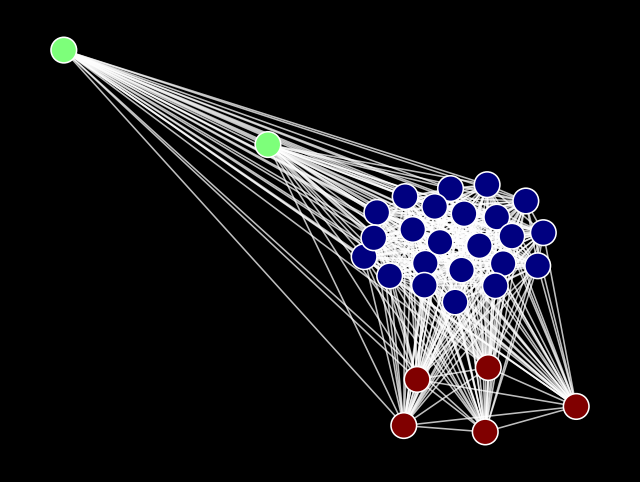

In [132]:
# Standard Library
import random
from collections import defaultdict
from copy import copy

# Third Party
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib import cm
from scipy.interpolate import splprep, splev
from scipy.spatial import ConvexHull


# COMMUNITY LAYOUT functions remain unchanged...

# Define all previous functions here (community_layout, draw_community_patches, etc.)

##################
# DRAW COMMUNITIES
##################
def draw_communities(adj_matrix, communities, dark=False, filename=None, dpi=None, seed=1):
    np.random.seed(seed)
    random.seed(seed)

    G = nx.from_numpy_array(adj_matrix)  # Use from_numpy_array instead of from_numpy_matrix
    partition = [0 for _ in range(G.number_of_nodes())]
    for c_i, nodes in enumerate(communities):
        for i in nodes:
            partition[i] = c_i

    plt.rcParams["figure.facecolor"] = "black" if dark else "white"
    plt.rcParams["axes.facecolor"] = "black" if dark else "white"

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis("off")

    node_size = 10200 / G.number_of_nodes()
    linewidths = 34 / G.number_of_nodes()

    pos = community_layout(G, partition)

    # Draw nodes
    nodes = nx.draw_networkx_nodes(
        G,
        pos=pos,
        node_size=node_size,
        node_color=partition,
        linewidths=linewidths,
        cmap=cm.jet,
        ax=ax
    )
    nodes.set_edgecolor("w")

    # Draw edges
    edges = nx.draw_networkx_edges(
        G,
        pos=pos,
        edge_color=(1.0, 1.0, 1.0, 0.75) if dark else (0.6, 0.6, 0.6, 1.0),
        width=linewidths,
        ax=ax
    )

    # Draw community patches
    draw_community_patches(nodes, communities, ax)

    # Save or show the plot
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename, dpi=dpi)

    return ax


# Example Usage
if __name__ == "__main__":
    # Create a random adjacency matrix for demonstration
    num_nodes = 30
    random.seed()
    adj_matrix = np.random.rand(num_nodes, num_nodes)
    adj_matrix = (adj_matrix + adj_matrix.T) / 2  # Make it symmetric for undirected graph
    np.fill_diagonal(adj_matrix, 0)  # No self-loops

    # Example community structure
    communities = [[0, 1, 2], [3, 4], [5, 6, 7, 8, 9]]

    # Draw the communities
    draw_communities(adj_matrix, communities, dark=True)


In [134]:
import networkx as nx
import community
import matplotlib.pyplot as plt
# Load the Karate network
G = nx.karate_club_graph()
# Run the Louvain algorithm
partition = community.best_partition(G)
# Draw the network with node colors based on community
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=plt.cm.Set1, node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Karate Club Network with Community Detection (Louvain)")
plt.axis("off")
plt.show()
# Print the nodes and their assigned communities
for node, community_id in partition.items():
    print(f"Node {node}: Community {community_id}")

ModuleNotFoundError: No module named 'community'